In [9]:
#importing libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#Load dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Cleaning the data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [10]:
#Filter for US jobs only    
df_usa_jobs = df[df['job_country'] == 'United States'].copy()


In [11]:
#get job posted month
df_usa_jobs['job_posted_month'] = df_usa_jobs['job_posted_date'].dt.strftime('%B')


In [12]:
#Pivot data to get count of jobs posted by month

df_usa_jobs_pivot = df_usa_jobs.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')

In [13]:
df_usa_jobs_pivot.reset_index(inplace=True)

In [14]:
df_usa_jobs_pivot['month_number'] = pd.to_datetime(df_usa_jobs_pivot['job_posted_month'], format= '%B').dt.month

In [15]:
df_usa_jobs_pivot.sort_values('month_number', inplace=True)
df_usa_jobs_pivot.set_index('job_posted_month', inplace=True)

In [16]:
top_5_jobs = df['job_title_short'].value_counts().head(5)
top_5_jobs = top_5_jobs.index.to_list()

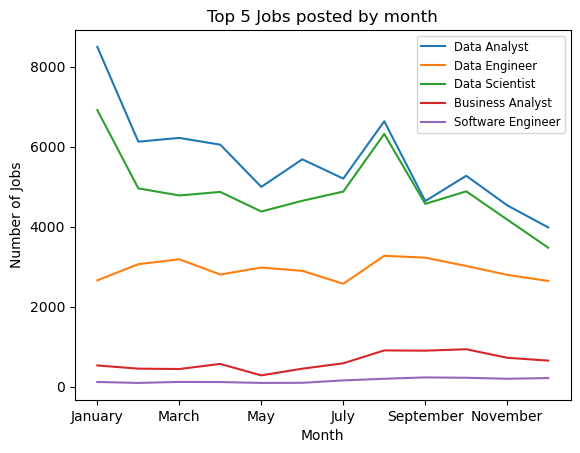

In [17]:
df_usa_jobs_pivot[top_5_jobs].plot(kind='line')
plt.title('Top 5 Jobs posted by month')
plt.ylabel('Number of Jobs')
plt.xlabel('Month') 
plt.legend(fontsize='small') 
plt.show()

In [18]:
software_jobs = pd.read_csv('https://lukeb.co/software_csv',index_col='job_posted_month')

In [19]:
big_dt = df_usa_jobs_pivot.merge(software_jobs, on='job_posted_month')
big_dt.drop(columns=['month_number'], inplace=True)

#big_dt

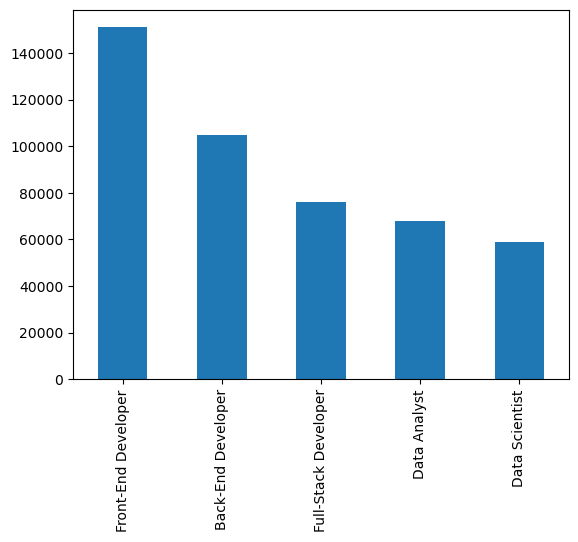

In [20]:
top_5_it_jobs = (big_dt.sum().
                 sort_values(ascending=False).
                 head(5).plot(kind='bar'))